# Установка зависимостей

In [ ]:
!nvidia-smi

Sat Jan 31 07:47:38 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   42C    P8             12W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install --upgrade ultralytics

In [ ]:
import ultralytics
from ultralytics import YOLO

In [ ]:
!pip install --upgrade roboflow

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Конфигурация API ключей
Перед тем как перейти на следующий этап, убедитесь что вы добавили Roboflow_API в свои секреты на Google colab

*   Откройте "Settings" на сайте roboflow.com. Нажмите на 'API keys' -> "Copy"
*   На сайте Colab, откройте панель слева и нажмите на "Секреты" (🔑). Сохраните ключ API под именем ROBOFLOW_API_KEY.



# Извлечение датасета

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [ ]:
from google.colab import userdata
from roboflow import Roboflow

In [ ]:
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(20)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-20 in yolov8:: 100%|██████████| 756/756 [00:00<00:00, 8106.70it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Обучение модели

In [ ]:
!yolo task=detect mode=train model=yolov8x.pt data = {dataset.location}/data.yaml batch=6 epochs=90 imgsz=1280 patience=15 plots=True

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=6, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/football-players-detection-20/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=90, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True

In [ ]:
old_path = '/content/datasets/runs/detect/train'
new_path = '/content/datasets/runs/detect/train_90ep'

os.rename(old_path, new_path)

In [ ]:
old_path = '/content/datasets/runs/detect/train_90ep/weights/best.pt'
new_path = '/content/datasets/runs/detect/train_90ep/weights/best_90ep.pt'

os.rename(old_path, new_path)

In [ ]:
!mv /content/datasets/runs/detect/train_90ep/weights/best_90ep.pt /content/drive/MyDrive/


In [ ]:
!mv /content/datasets/runs/detect/train_90ep /content/drive/MyDrive/

In [ ]:
%cd {HOME}
!mkdir runs

/content


In [ ]:
!cd {HOME}/runs
!mkdir {HOME}/runs/detect

In [ ]:
!cp -r /content/runs/detect/train_90ep /content/drive/MyDrive/

/content


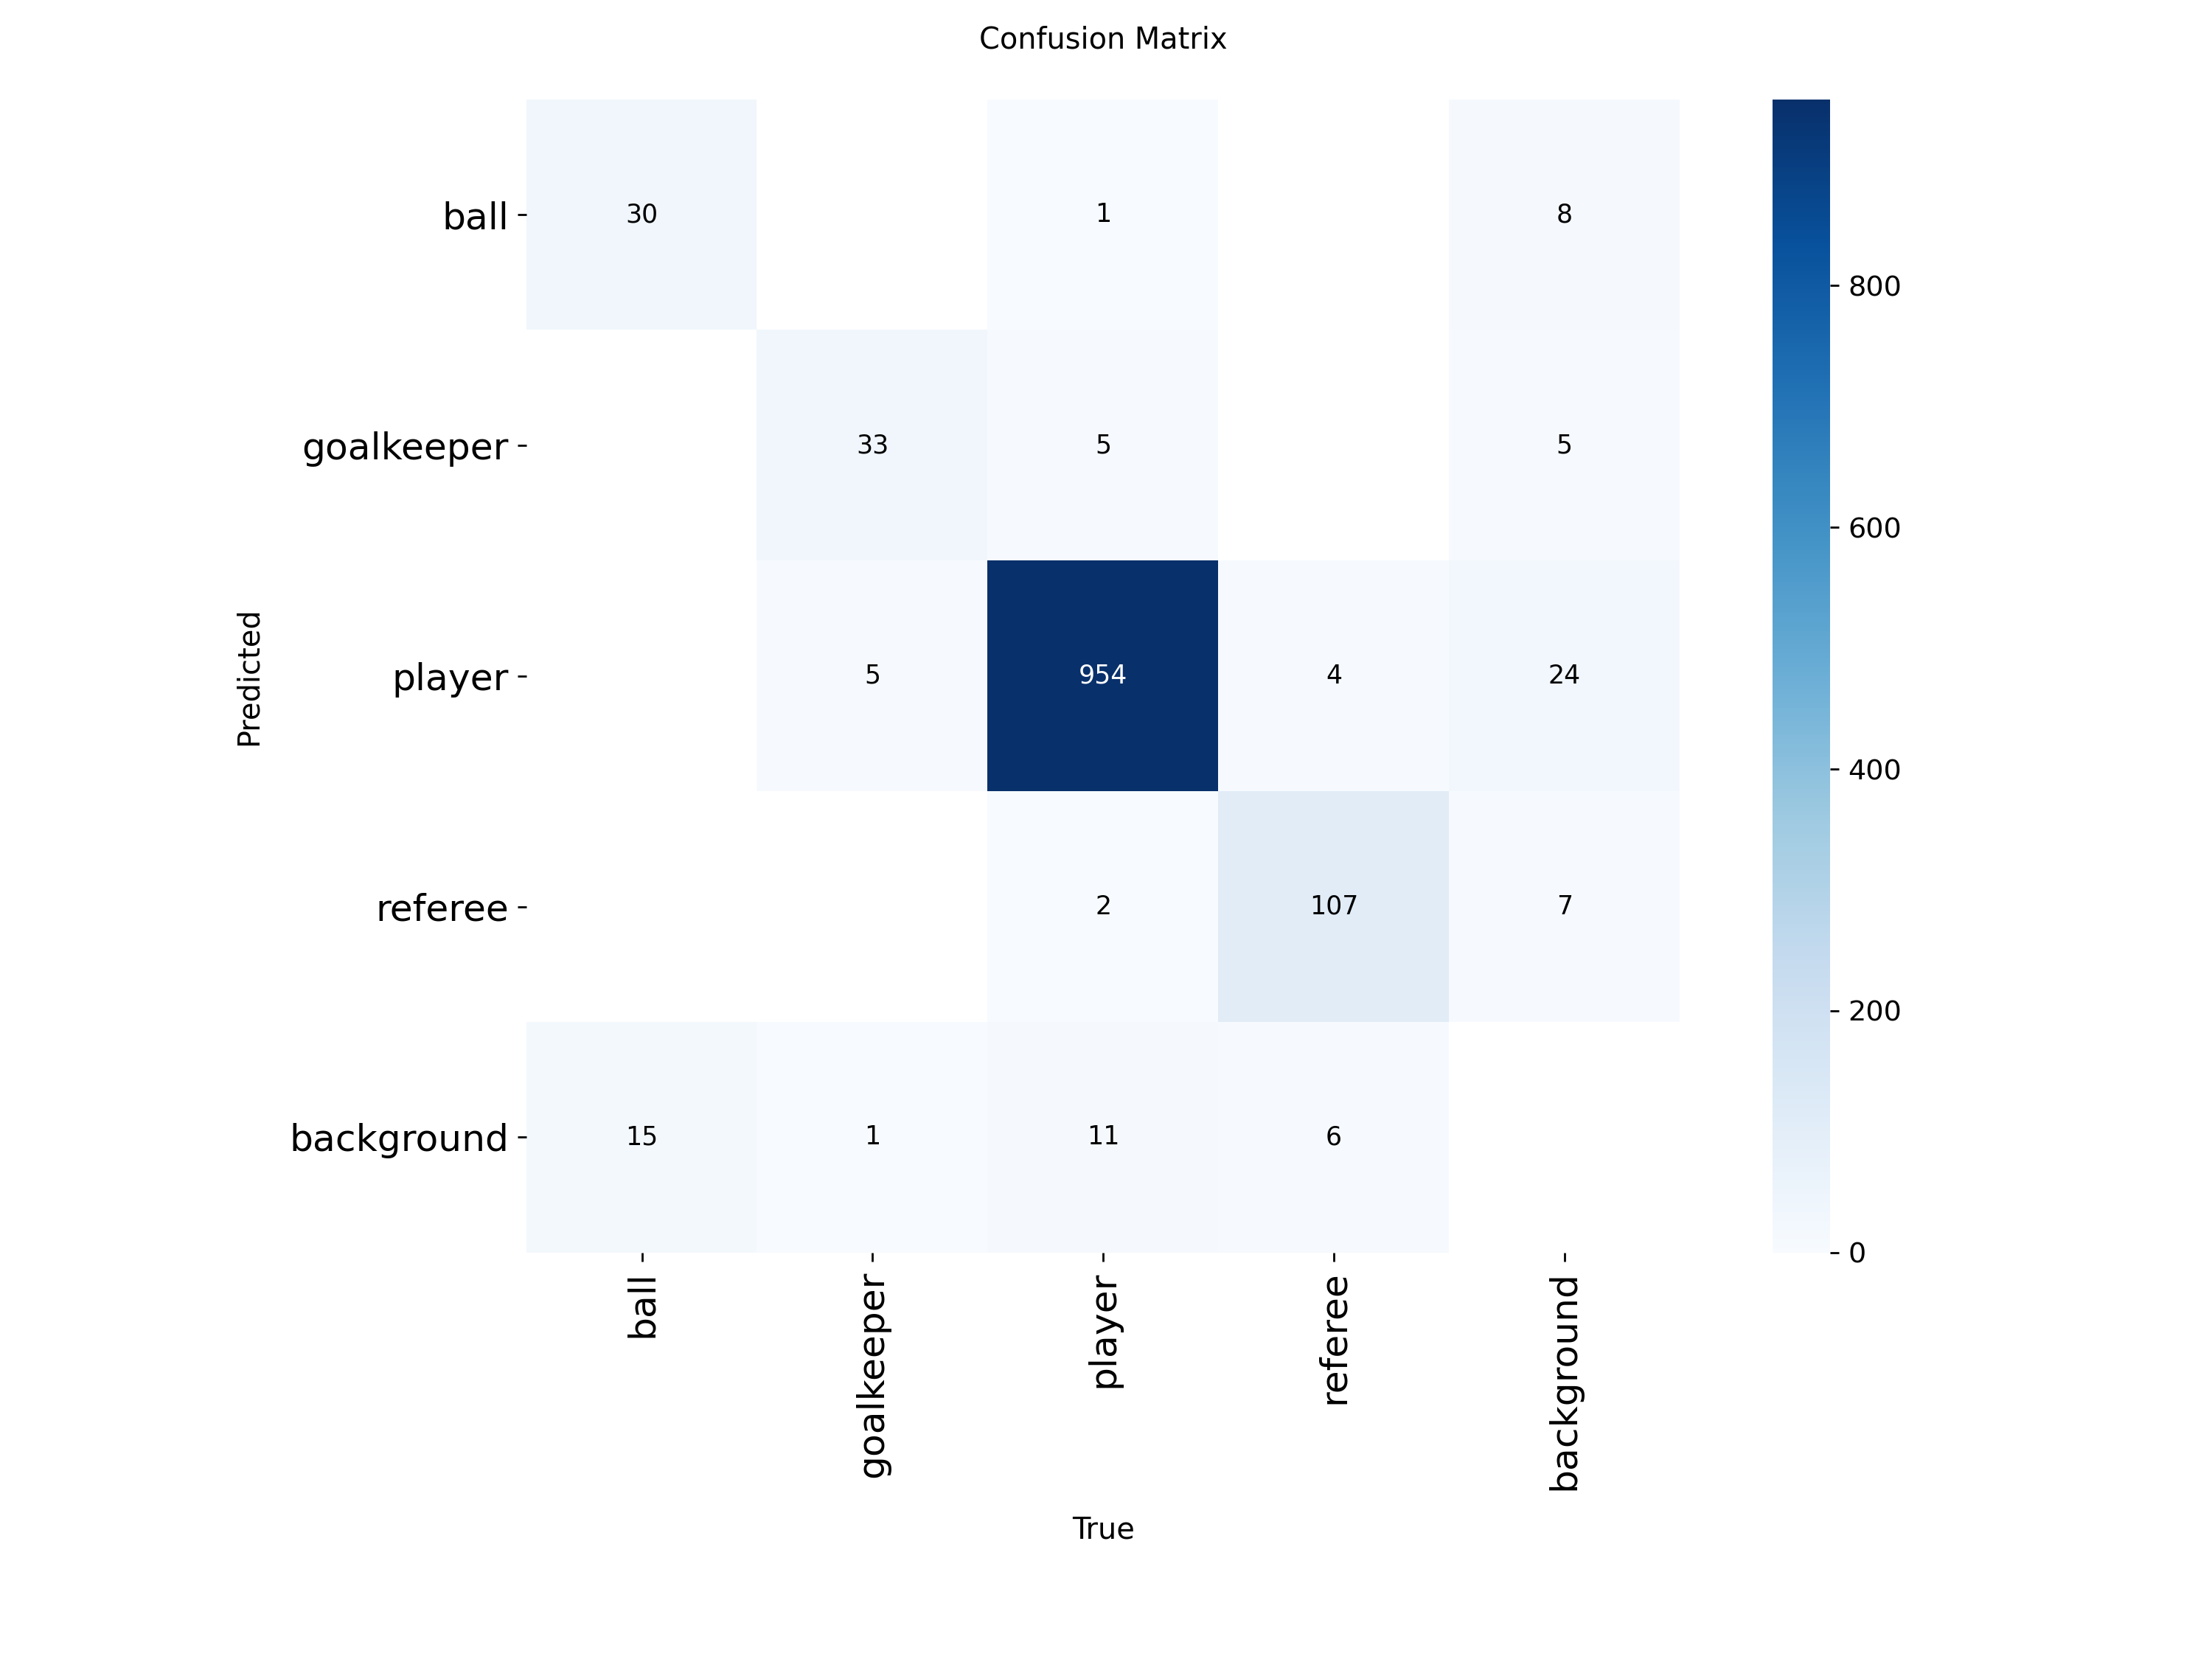

In [ ]:
from google.colab import userdata
from IPython.display import Image
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train_90ep/confusion_matrix.png', width=600)

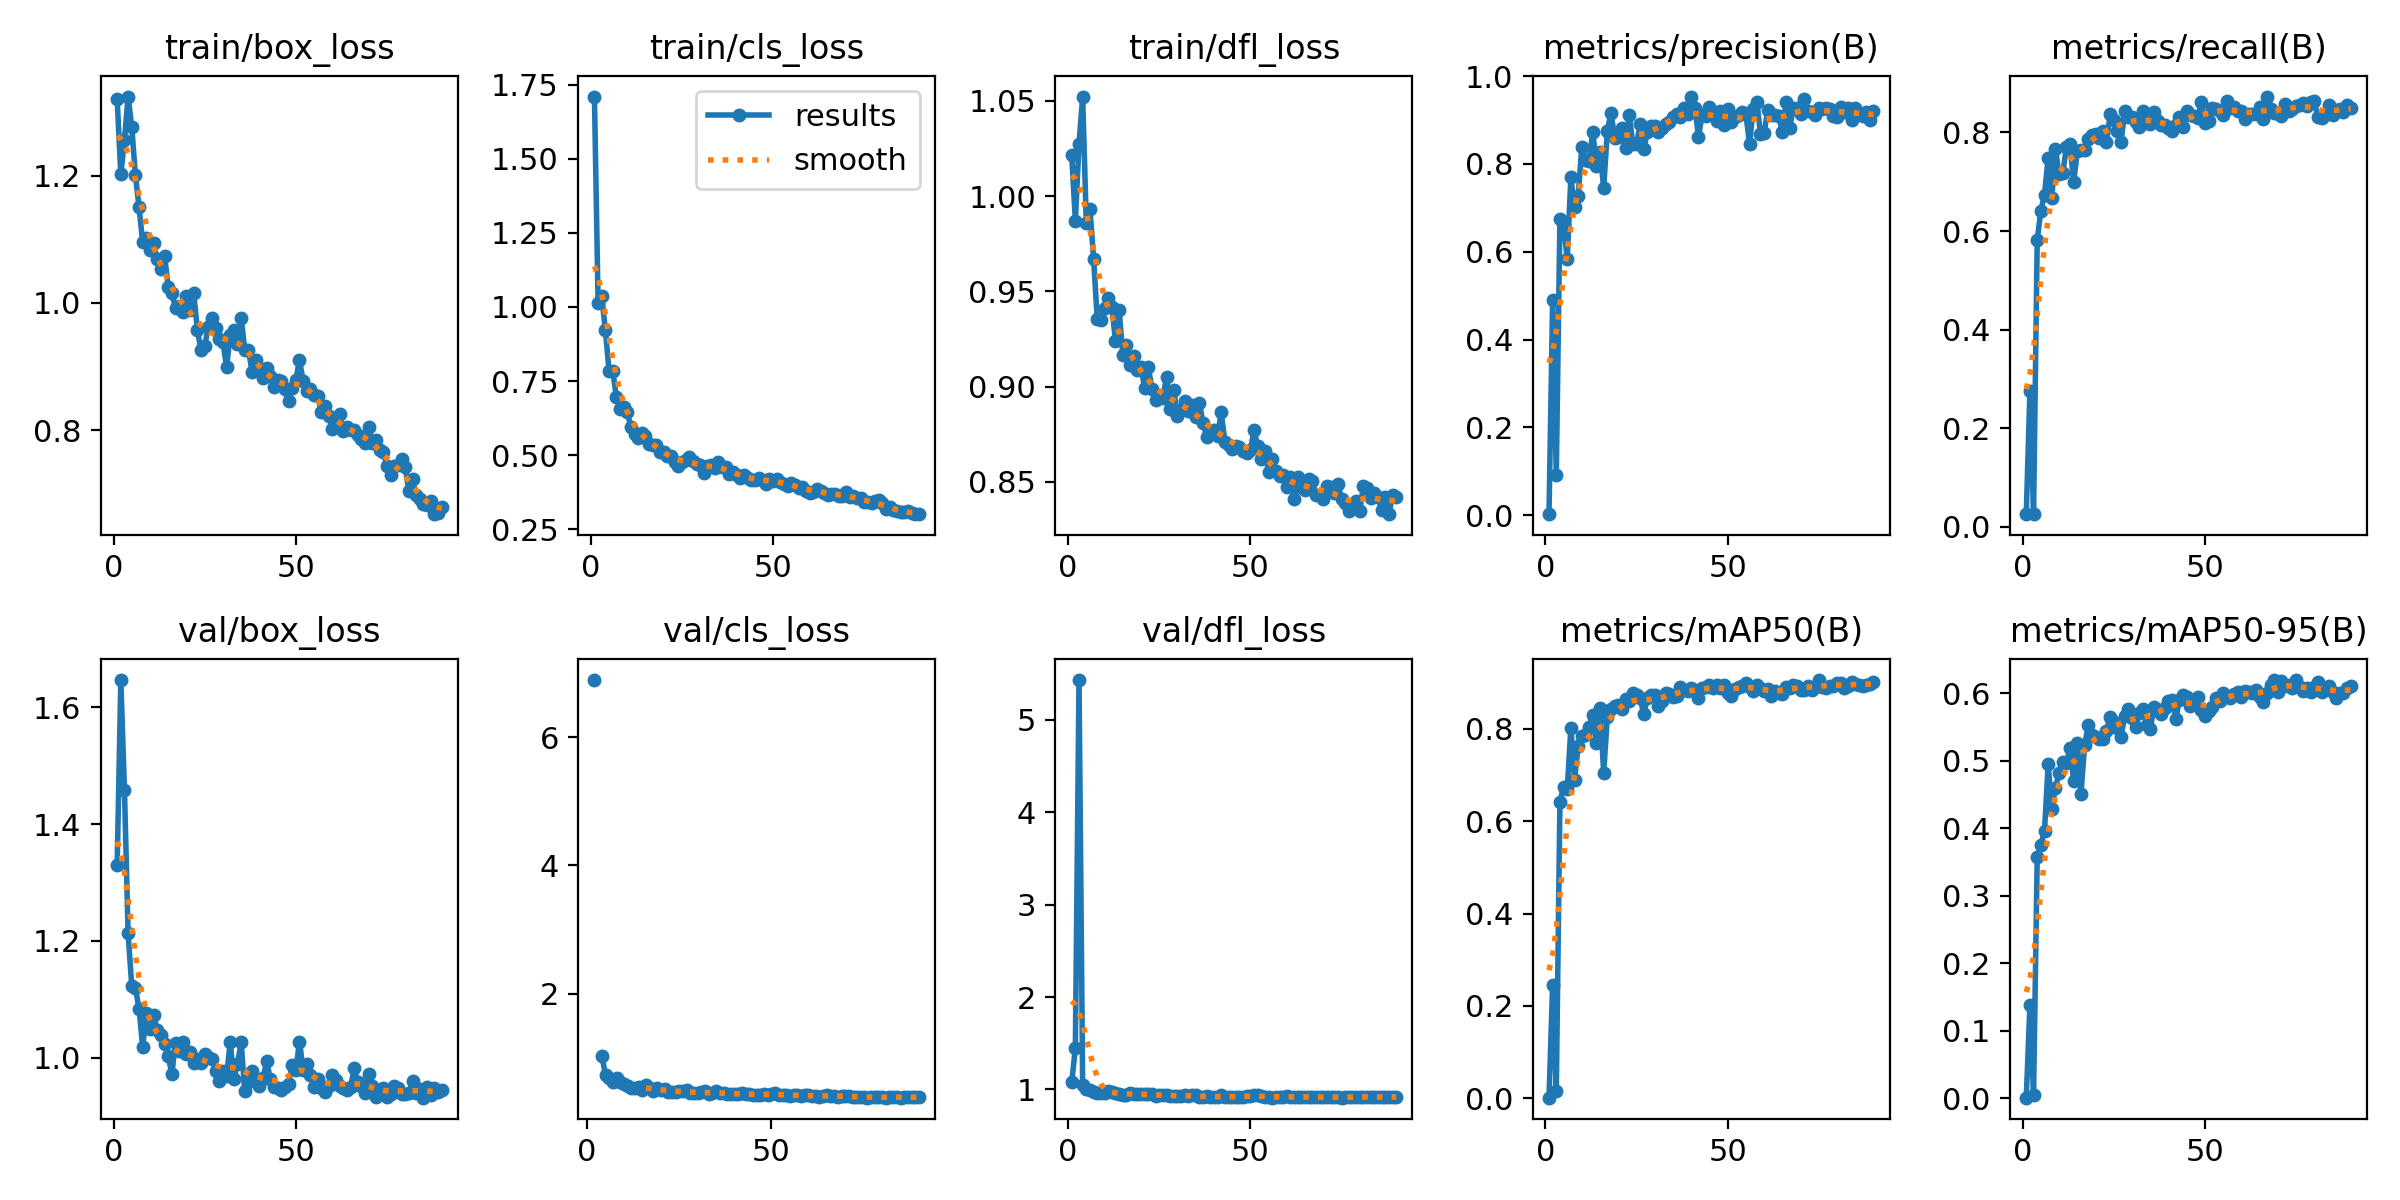

In [ ]:
Image(filename=f'{HOME}/runs/detect/train_90ep/results.png', width=600)